<a href="https://colab.research.google.com/github/codespaghettifier/sp500-exploration/blob/master/clean_yahoo_financials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from datetime import datetime
import random
import seaborn as sns

In [2]:
with open('data/yahoo/merged_financials.json', 'r') as json_file:
    yahoo_financials_json = json.load(json_file)

In [3]:
tickers = list(yahoo_financials_json.keys())

tickers[:10]

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE']

In [4]:
statement_types = list(yahoo_financials_json[tickers[0]].keys())

statement_types

['quarterly_income',
 'quarterly_balance',
 'quarterly_cashflow',
 'annual_income',
 'annual_balance',
 'annual_cashflow']

In [5]:
timetamps = [list(i.keys())[0] for i in yahoo_financials_json[tickers[0]][statement_types[0]]]
timetamps

['1690754400', '1667170800', '1675119600', '1682805600', '1635631200']

In [6]:
# Get a set of all position types present in statements by statement type
position_types_by_statement_type = {}
for type in statement_types:
    position_types_by_statement_type[type] = set()

for ticker in tickers:
    for statement_type in statement_types:
        statements = yahoo_financials_json[ticker][statement_type]
        for statement in statements:
            for position_type in list(statement.values())[0].keys():
                position_types_by_statement_type[statement_type] |= {position_type}

random.sample(position_types_by_statement_type[statement_types[0]], 10)

<ipython-input-6-5e7acb75221f>:13: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(position_types_by_statement_type[statement_types[0]], 10)


['totalOtherFinanceCost',
 'otherSpecialCharges',
 'preferredStockDividends',
 'insuranceAndClaims',
 'normalizedIncome',
 'netIncomeExtraordinary',
 'depreciationAmortizationDepletionIncomeStatement',
 'reconciledDepreciation',
 'minorityInterests',
 'earningsFromEquityInterest']

In [ ]:
# Count occurences of each position type in statemens
position_occurences = {}
for statement_type in statement_types:
    position_occurences[statement_type] = {}
    for position_type in position_types_by_statement_type[statement_type]:
        position_occurences[statement_type][position_type] = 0

for ticker in tickers:
    for statement_type in statement_types:
        statements = yahoo_financials_json[ticker][statement_type]
        for statement in statements:
            for position_type in list(statement.values())[0].keys():
                position_occurences[statement_type][position_type] += 1

random.sample(position_occurences[statement_types[0]].items(), 10)

<ipython-input-7-ba9f3f2726e1>:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(position_occurences[statement_types[0]].items(), 10)


[('totalOtherFinanceCost', 332),
 ('otherGandA', 815),
 ('dilutedEPS', 2409),
 ('salariesAndWages', 350),
 ('totalOperatingIncomeAsReported', 1770),
 ('restructuringAndMergernAcquisition', 869),
 ('grossProfit', 2149),
 ('basicAverageShares', 2411),
 ('otherSpecialCharges', 513),
 ('otherTaxes', 215)]

In [ ]:
# For each statement type get a list of position types sorted by their occurence
position_occurences_sorted = {}
for statement_type in statement_types:
    position_occurences_sorted[statement_type] = sorted(position_occurences[statement_type].items(), key=lambda x: x[1], reverse=True)

for statement_type in statement_types:
    print(statement_type)
    for position_type, occurence in position_occurences_sorted[statement_type]:
        print(f'\t{occurence}:\t {position_type}')
    print()

quarterly_income
	2411:	 basicAverageShares
	2411:	 dilutedAverageShares
	2409:	 dilutedEPS
	2409:	 basicEPS
	2405:	 netIncomeCommonStockholders
	2405:	 taxEffectOfUnusualItems
	2405:	 netIncomeContinuousOperations
	2405:	 netIncomeIncludingNoncontrollingInterests
	2405:	 pretaxIncome
	2405:	 taxRateForCalcs
	2405:	 normalizedIncome
	2405:	 operatingRevenue
	2405:	 totalRevenue
	2405:	 netIncome
	2405:	 netIncomeFromContinuingAndDiscontinuedOperation
	2405:	 dilutedNIAvailtoComStockholders
	2405:	 netIncomeFromContinuingOperationNetMinorityInterest
	2374:	 taxProvision
	2362:	 netInterestIncome
	2330:	 reconciledDepreciation
	2273:	 totalExpenses
	2269:	 ebit
	2230:	 netNonOperatingInterestIncomeExpense
	2200:	 interestExpense
	2174:	 operatingIncome
	2174:	 eBITDA
	2174:	 normalizedEBITDA
	2167:	 operatingExpense
	2149:	 grossProfit
	2149:	 reconciledCostOfRevenue
	2149:	 costOfRevenue
	2137:	 sellingGeneralAndAdministration
	2122:	 otherIncomeExpense
	2068:	 interestExpenseNonOperati

In [7]:
position_types_selected_for_analysis = {}
position_types_selected_for_analysis['quarterly_income'] = [
    'totalRevenue',
    'totalExpenses',
    'grossProfit',
    'netIncome',
    'ebit',
    'eBITDA',
    'operatingRevenue',
    'operatingIncome',
    'dilutedEPS',
]
position_types_selected_for_analysis['quarterly_balance'] = [
    'totalAssets',
    'totalLiabilitiesNetMinorityInterest',
    'totalDebt',
    'ordinarySharesNumber',
    'commonStockEquity',
    'tangibleBookValue',
    'investedCapital',
]
position_types_selected_for_analysis['quarterly_cashflow'] = [
    'operatingCashFlow',
    'investingCashFlow',
    'financingCashFlow',
    'freeCashFlow',
]
position_types_selected_for_analysis['annual_income'] = [
    'totalRevenue',
    'totalExpenses',
    'grossProfit',
    'netIncome',
    'ebit',
    'eBITDA',
    'operatingRevenue',
    'operatingIncome',
    'dilutedEPS',
]
position_types_selected_for_analysis['annual_balance'] = [
    'totalAssets',
    'totalLiabilitiesNetMinorityInterest',
    'totalDebt',
    'ordinarySharesNumber',
    'commonStockEquity',
    'tangibleBookValue',
    'investedCapital',
]
position_types_selected_for_analysis['annual_cashflow'] = [
    'operatingCashFlow',
    'investingCashFlow',
    'financingCashFlow',
    'freeCashFlow',
]


In [9]:
# Filter out statements missing position types selected for analysis
yahoo_financials_complete = {}
for ticker in tickers:
    yahoo_financials_complete[ticker] = {}
    for statement_type in statement_types:
        yahoo_financials_complete[ticker][statement_type] = []
        for statement in yahoo_financials_json[ticker][statement_type]:
            complete = True
            for position_type in position_types_selected_for_analysis[statement_type]:
                if position_type not in list(statement.values())[0].keys():
                    complete = False
                    break
            if complete:
                yahoo_financials_complete[ticker][statement_type].append(statement)

In [13]:
# Filter out positions not selected for analysis
yahoo_financials_selected = {}
for ticker in tickers:
    yahoo_financials_selected[ticker] = {}
    for statement_type in statement_types:
        yahoo_financials_selected[ticker][statement_type] = []
        for statement in yahoo_financials_complete[ticker][statement_type]:
            timestamp = list(statement.keys())[0]
            positions = {position_type: list(statement.values())[0][position_type] for position_type in position_types_selected_for_analysis[statement_type]}
            yahoo_financials_selected[ticker][statement_type].append({
                timestamp: positions
            })

In [ ]:
file_path = f'data/yahoo/merged_selected_financials.json'
with open(file_path, 'w') as json_file:
    json.dump(yahoo_financials_selected, json_file, indent=4)

In [ ]:
# Insert finance data to pandas dataframes
quarterly_income_df = pd.DataFrame()
quarterly_balance_df = pd.DataFrame()
quarterly_cashflow_df = pd.DataFrame()
annual_income_df = pd.DataFrame()
annual_balance_df = pd.DataFrame()
annual_cashflow_df = pd.DataFrame()

for ticker in tickers:
    for statement in yahoo_financials_complete[ticker]['quarterly_income']:
        for timestamp in statement:
          quarterly_income_df = pd.concat([quarterly_income_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['quarterly_balance']:
        for timestamp in statement:
          quarterly_balance_df = pd.concat([quarterly_balance_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['quarterly_cashflow']:
        for timestamp in statement:
          quarterly_cashflow_df = pd.concat([quarterly_cashflow_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['annual_income']:
        for timestamp in statement:
          annual_income_df = pd.concat([annual_income_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['annual_balance']:
        for timestamp in statement:
          annual_balance_df = pd.concat([annual_balance_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)
    for statement in yahoo_financials_complete[ticker]['annual_cashflow']:
        for timestamp in statement:
          annual_cashflow_df = pd.concat([annual_cashflow_df, pd.DataFrame (statement[timestamp], index=[0])], ignore_index=True)

In [ ]:
quarterly_income_df

,totalExpenses,netNonOperatingInterestIncomeExpense,taxRateForCalcs,reconciledCostOfRevenue,interestExpenseNonOperating,netInterestIncome,otherNonOperatingIncomeExpenses,costOfRevenue,eBITDA,ebit,...,netIncomeDiscontinuousOperations,depreciationIncomeStatement,rentAndLandingFees,preferredStockDividends,exciseTaxes,insuranceAndClaims,depletionIncomeStatement,netIncomeExtraordinary,netIncomeFromTaxLossCarryforward,securitiesAmortization
0,1.539000e+09,-11000000.0,0.175400,1.014000e+09,96000000.0,-57000000.0,18000000.0,3.432000e+09,2.270000e+08,1.470000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.378000e+09,-18000000.0,0.141200,8.370000e+08,23000000.0,-18000000.0,2000000.0,8.370000e+08,5.510000e+08,4.780000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.330000e+09,-16000000.0,0.137500,7.880000e+08,25000000.0,-16000000.0,NaN,7.880000e+08,5.020000e+08,4.350000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.334000e+09,-12000000.0,0.137500,7.930000e+08,24000000.0,-12000000.0,6000000.0,7.930000e+08,4.720000e+08,4.010000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.253200e+10,-429000000.0,0.265957,1.063800e+10,499000000.0,-429000000.0,157000000.0,1.063800e+10,1.157000e+09,1.157000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,1.279000e+09,-40000000.0,0.208000,5.290000e+08,53000000.0,-40000000.0,2000000.0,6.070000e+08,8.350000e+08,7.200000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2142,1.350000e+09,-62000000.0,0.222973,6.530000e+08,62000000.0,-62000000.0,-34000000.0,6.530000e+08,6.890000e+08,6.540000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2143,1.272000e+09,-63000000.0,0.209469,5.880000e+08,63000000.0,-63000000.0,53000000.0,5.880000e+08,7.970000e+08,7.600000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2144,1.346000e+09,-58000000.0,0.231651,6.070000e+08,58000000.0,-58000000.0,104000000.0,6.070000e+08,9.670000e+08,9.300000e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
qi_corr = quarterly_income_df[position_types_selected_for_analysis['quarterly_income']].corr()
qb_corr = quarterly_balance_df[position_types_selected_for_analysis['quarterly_balance']].corr()
qc_corr = quarterly_cashflow_df[position_types_selected_for_analysis['quarterly_cashflow']].corr()

In [ ]:
ai_corr = annual_income_df[position_types_selected_for_analysis['annual_income']].corr()
ab_corr = annual_balance_df[position_types_selected_for_analysis['annual_balance']].corr()
ac_corr = annual_cashflow_df[position_types_selected_for_analysis['annual_cashflow']].corr()

In [ ]:
qi_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS
totalRevenue,1.000000,0.786097,0.748089,0.519053,0.405488,0.690730,0.664637,0.611641,0.021518
totalExpenses,0.786097,1.000000,0.537671,0.352090,0.491304,0.552521,0.790088,0.429540,0.041454
grossProfit,0.748089,0.537671,1.000000,0.766035,0.549811,0.791273,0.566197,0.764460,0.045118
netIncome,0.519053,0.352090,0.766035,1.000000,0.657444,0.819367,0.418636,0.818371,0.106569
ebit,0.405488,0.491304,0.549811,0.657444,1.000000,0.768954,0.632766,0.747267,0.097497
eBITDA,0.690730,0.552521,0.791273,0.819367,0.768954,1.000000,0.623670,0.921922,0.073920
operatingRevenue,0.664637,0.790088,0.566197,0.418636,0.632766,0.623670,1.000000,0.528023,0.054288
operatingIncome,0.611641,0.429540,0.764460,0.818371,0.747267,0.921922,0.528023,1.000000,0.043491
dilutedEPS,0.021518,0.041454,0.045118,0.106569,0.097497,0.073920,0.054288,0.043491,1.000000


In [ ]:
ai_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS
totalRevenue,1.000000,0.990704,0.813626,0.597518,0.595692,0.676357,0.998986,0.590603,0.010349
totalExpenses,0.990704,1.000000,0.741666,0.493675,0.509051,0.594759,0.989271,0.497749,0.003853
grossProfit,0.813626,0.741666,1.000000,0.839085,0.775312,0.838235,0.814446,0.780855,0.015896
netIncome,0.597518,0.493675,0.839085,1.000000,0.857161,0.857209,0.599041,0.814994,0.079662
ebit,0.595692,0.509051,0.775312,0.857161,1.000000,0.972247,0.597199,0.968660,0.058125
eBITDA,0.676357,0.594759,0.838235,0.857209,0.972247,1.000000,0.677519,0.946982,0.040839
operatingRevenue,0.998986,0.989271,0.814446,0.599041,0.597199,0.677519,1.000000,0.592113,0.010258
operatingIncome,0.590603,0.497749,0.780855,0.814994,0.968660,0.946982,0.592113,1.000000,0.034877
dilutedEPS,0.010349,0.003853,0.015896,0.079662,0.058125,0.040839,0.010258,0.034877,1.000000


In [ ]:
qb_corr

,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital
totalAssets,1.000000,0.993646,0.897870,0.356217,0.142182,0.111502,0.300916
totalLiabilitiesNetMinorityInterest,0.993646,1.000000,0.886261,0.300038,0.129028,0.103622,0.286549
totalDebt,0.897870,0.886261,1.000000,0.426152,0.114119,0.066152,0.288225
ordinarySharesNumber,0.356217,0.300038,0.426152,1.000000,0.106948,0.064169,0.174800
commonStockEquity,0.142182,0.129028,0.114119,0.106948,1.000000,0.994074,0.983508
tangibleBookValue,0.111502,0.103622,0.066152,0.064169,0.994074,1.000000,0.969348
investedCapital,0.300916,0.286549,0.288225,0.174800,0.983508,0.969348,1.000000


In [ ]:
ab_corr

,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital
totalAssets,1.000000,0.993785,0.877219,0.362107,0.697378,0.590850,0.873100
totalLiabilitiesNetMinorityInterest,0.993785,1.000000,0.864340,0.308454,0.614202,0.531965,0.821495
totalDebt,0.877219,0.864340,1.000000,0.436267,0.655181,0.420385,0.902793
ordinarySharesNumber,0.362107,0.308454,0.436267,1.000000,0.585300,0.396504,0.548163
commonStockEquity,0.697378,0.614202,0.655181,0.585300,1.000000,0.781280,0.905083
tangibleBookValue,0.590850,0.531965,0.420385,0.396504,0.781280,1.000000,0.660928
investedCapital,0.873100,0.821495,0.902793,0.548163,0.905083,0.660928,1.000000


In [ ]:
qc_corr

,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
operatingCashFlow,1.000000,-0.309378,-0.518932,0.815778
investingCashFlow,-0.309378,1.000000,-0.071195,-0.278940
financingCashFlow,-0.518932,-0.071195,1.000000,-0.473130
freeCashFlow,0.815778,-0.278940,-0.473130,1.000000


In [ ]:
ac_corr

,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
operatingCashFlow,1.000000,-0.281796,-0.349815,0.927824
investingCashFlow,-0.281796,1.000000,-0.608470,-0.206715
financingCashFlow,-0.349815,-0.608470,1.000000,-0.369559
freeCashFlow,0.927824,-0.206715,-0.369559,1.000000


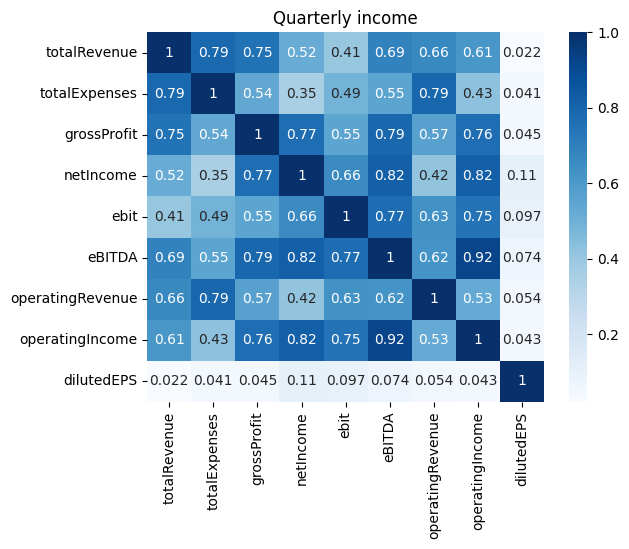

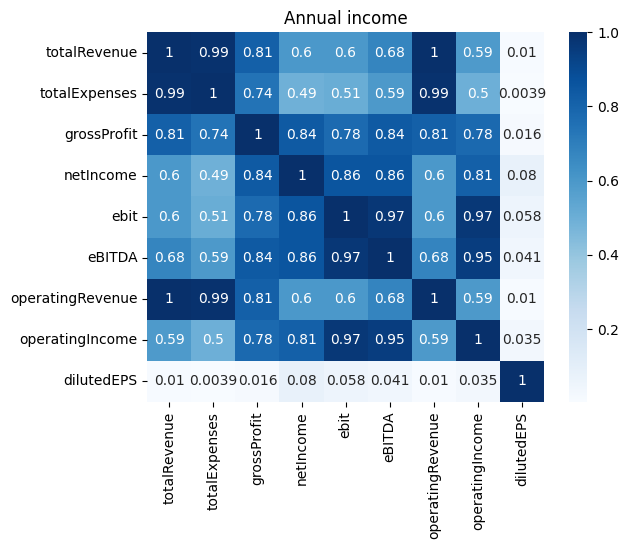

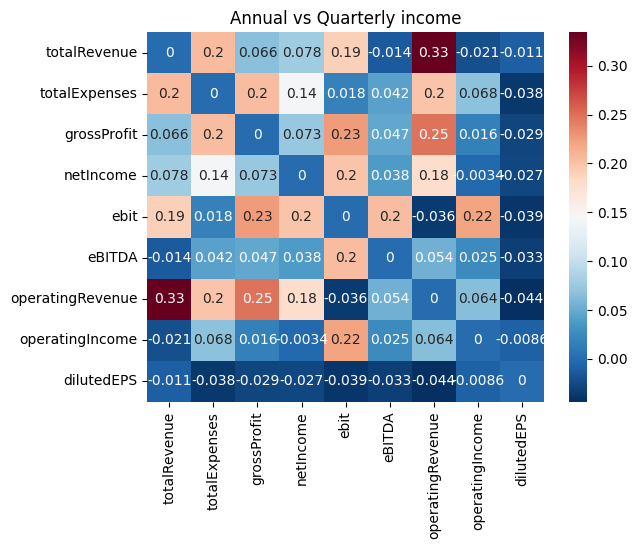

In [ ]:
sns.heatmap(qi_corr, annot=True, cmap="Blues")
plt.title("Quarterly income")
plt.show()

sns.heatmap(ai_corr, annot=True, cmap="Blues")
plt.title("Annual income")
plt.show()

i_diff = ai_corr - qi_corr
sns.heatmap(i_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly income")
plt.show()

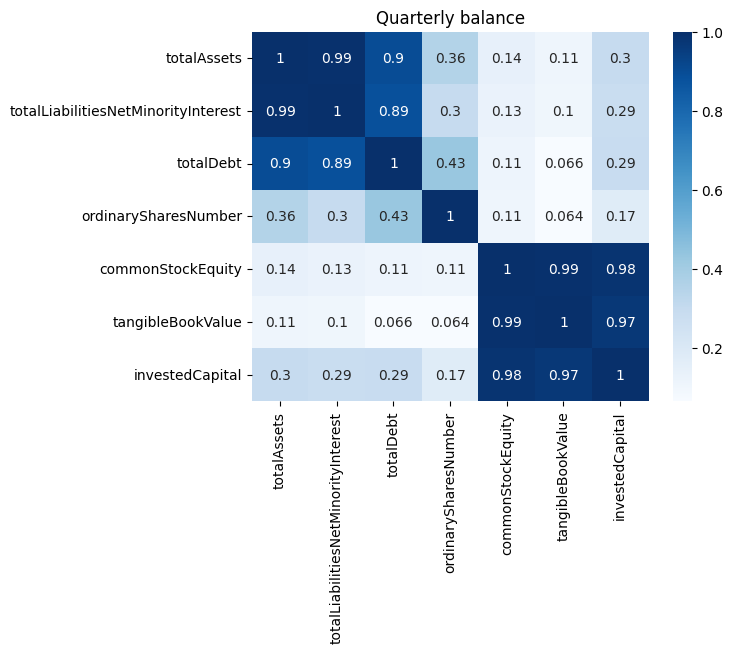

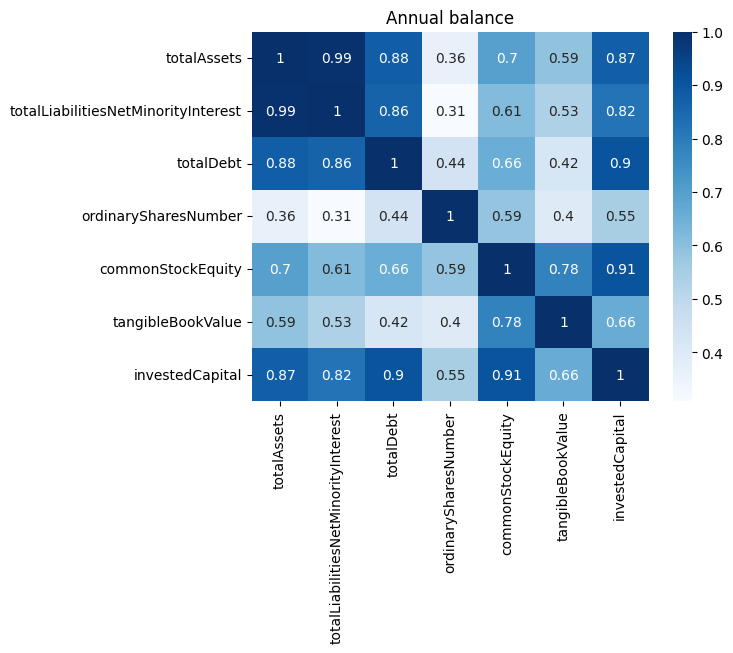

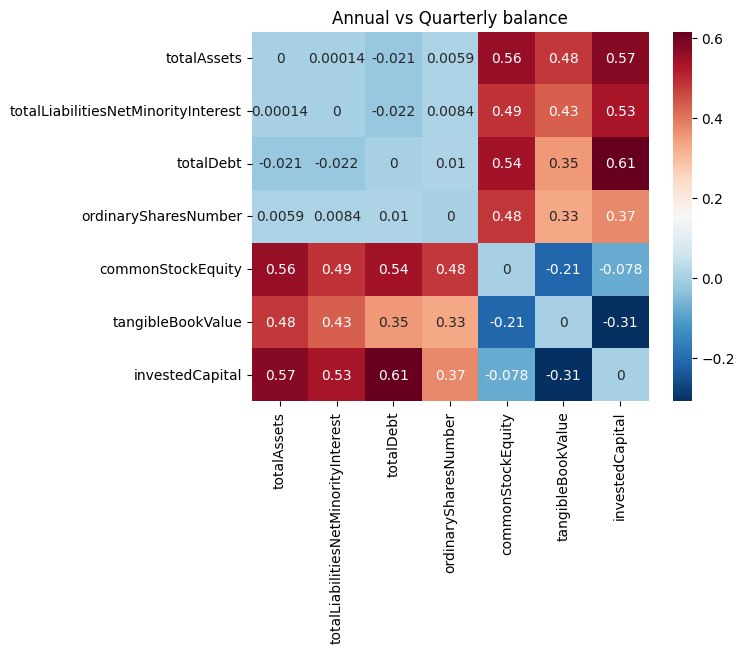

In [ ]:
sns.heatmap(qb_corr, annot=True, cmap="Blues")
plt.title("Quarterly balance")
plt.show()

sns.heatmap(ab_corr, annot=True, cmap="Blues")
plt.title("Annual balance")
plt.show()

b_diff = ab_corr - qb_corr
sns.heatmap(b_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly balance")
plt.show()

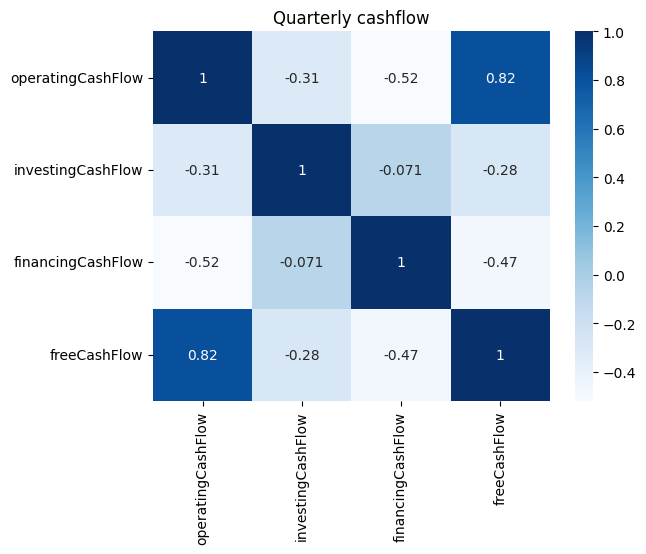

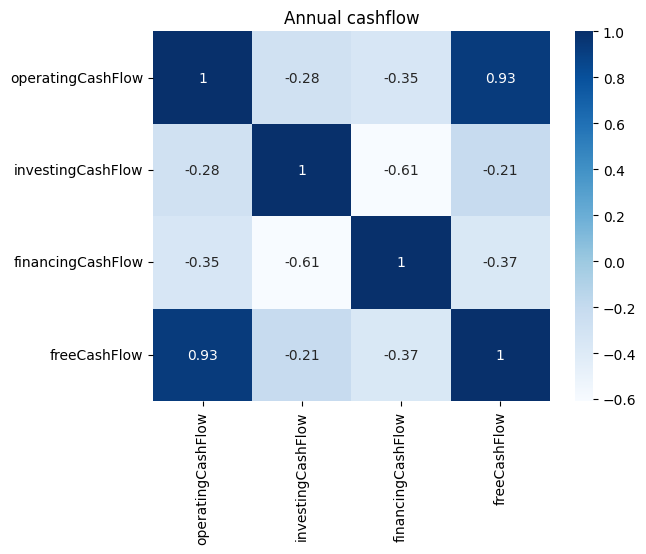

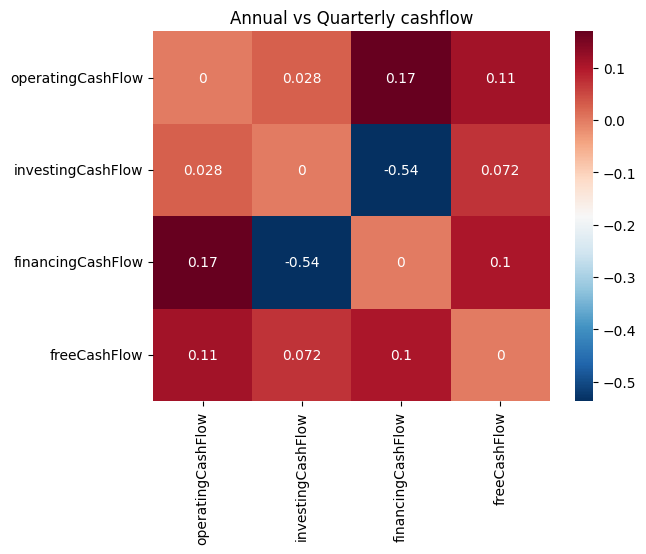

In [ ]:
sns.heatmap(qc_corr, annot=True, cmap="Blues")
plt.title("Quarterly cashflow")
plt.show()

sns.heatmap(ac_corr, annot=True, cmap="Blues")
plt.title("Annual cashflow")
plt.show()

c_diff = ac_corr - qc_corr
sns.heatmap(c_diff, annot=True, cmap="RdBu_r")
plt.title("Annual vs Quarterly cashflow")
plt.show()

In [53]:
# Łączenie kategorii do jednego datasetu (20s)

quarter_df = pd.DataFrame()
annual_df = pd.DataFrame()

for ticker in tickers:
    for statement in yahoo_financials_complete[ticker]['quarterly_income']:
      for timestamp in statement:
        rec_df = pd.DataFrame()

        rec_df['timestamp'] = [timestamp]
        rec_df['ticker'] = [ticker]
        for pos in position_types_selected_for_analysis['quarterly_income']:
          rec_df[pos] = [statement[timestamp].get(pos)]

        for rec in yahoo_financials_complete[ticker]['quarterly_balance']:
          for time in rec:
            if time == timestamp:
              for pos in position_types_selected_for_analysis['quarterly_balance']:
                rec_df[pos] = [rec[time].get(pos)]

        for rec in yahoo_financials_complete[ticker]['quarterly_cashflow']:
          for time in rec:
            if time == timestamp:
              for pos in position_types_selected_for_analysis['quarterly_cashflow']:
                rec_df[pos] = [rec[time].get(pos)]

        quarter_df = pd.concat([quarter_df, rec_df], ignore_index=True)

    for statement in yahoo_financials_complete[ticker]['annual_income']:
        for timestamp in statement:
          rec_df = pd.DataFrame()

          rec_df['timestamp'] = [timestamp]
          rec_df['ticker'] = [ticker]
          for pos in position_types_selected_for_analysis['annual_income']:
            rec_df[pos] = [statement[timestamp].get(pos)]

          for rec in yahoo_financials_complete[ticker]['annual_balance']:
            for time in rec:
              if time == timestamp:
                for pos in position_types_selected_for_analysis['annual_balance']:
                  rec_df[pos] = [rec[time].get(pos)]
          for rec in yahoo_financials_complete[ticker]['annual_cashflow']:
            for time in rec:
              if time == timestamp:
                for pos in position_types_selected_for_analysis['annual_cashflow']:
                  rec_df[pos] = [rec[time].get(pos)]
          annual_df = pd.concat([annual_df, rec_df], ignore_index=True)


In [54]:
print(quarter_df)

       timestamp ticker  totalRevenue  totalExpenses   grossProfit  \
0     1690754400      A  1.672000e+09   1.539000e+09  6.580000e+08   
1     1667170800      A  1.849000e+09   1.378000e+09  1.012000e+09   
2     1675119600      A  1.756000e+09   1.330000e+09  9.680000e+08   
3     1682805600      A  1.717000e+09   1.334000e+09  9.240000e+08   
4     1664488800    AAL  1.346200e+10   1.253200e+10  2.824000e+09   
...          ...    ...           ...            ...           ...   
2141  1664488800    ZTS  2.002000e+09   1.279000e+09  1.395000e+09   
2142  1672441200    ZTS  2.040000e+09   1.350000e+09  1.387000e+09   
2143  1680213600    ZTS  2.000000e+09   1.272000e+09  1.412000e+09   
2144  1688076000    ZTS  2.180000e+09   1.346000e+09  1.573000e+09   
2145  1696024800    ZTS  2.151000e+09   1.353000e+09  5.885000e+09   

        netIncome          ebit        eBITDA  operatingRevenue  \
0     111000000.0  1.470000e+09  2.270000e+08      1.672000e+09   
1     368000000.0  4.7800

In [55]:
quarter_corr = quarter_df[2:].corr()
annual_corr = annual_df[2:].corr()

<ipython-input-55-1dc2a75af17e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quarter_corr = quarter_df[2:].corr()
<ipython-input-55-1dc2a75af17e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  annual_corr = annual_df[2:].corr()


In [56]:
quarter_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow
totalRevenue,1.000000,0.786079,0.748069,0.519031,0.405484,0.690708,0.664607,0.611620,0.021523,0.573442,0.565636,0.432907,0.513672,0.465801,0.347727,0.498328,0.501631,-0.318632,-0.279658,0.461284
totalExpenses,0.786079,1.000000,0.537629,0.352056,0.491306,0.552484,0.790066,0.429505,0.041459,0.569666,0.539432,0.406913,0.452074,0.497573,0.376866,0.500098,0.627389,-0.368400,-0.307414,0.447910
grossProfit,0.748069,0.537629,1.000000,0.766027,0.549818,0.791257,0.566154,0.764449,0.045127,0.642958,0.598278,0.487452,0.651056,0.571949,0.316505,0.610689,0.629968,-0.295833,-0.429692,0.701095
netIncome,0.519031,0.352056,0.766027,1.000000,0.657450,0.819361,0.418604,0.818364,0.106579,0.478577,0.434231,0.307797,0.604307,0.455616,0.375216,0.456987,0.535032,-0.156117,-0.398472,0.687139
ebit,0.405484,0.491306,0.549818,0.657450,1.000000,0.768970,0.632781,0.747278,0.097479,0.606943,0.498707,0.364511,0.670706,0.646189,0.513422,0.611458,0.833425,-0.294260,-0.611783,0.695321
eBITDA,0.690708,0.552484,0.791257,0.819361,0.768970,1.000000,0.623637,0.921919,0.073931,0.606691,0.544786,0.421242,0.691929,0.582023,0.441811,0.587997,0.754935,-0.308194,-0.511996,0.632591
operatingRevenue,0.664607,0.790066,0.566154,0.418604,0.632781,0.623637,1.000000,0.527994,0.054296,0.643244,0.594530,0.449842,0.539845,0.589764,0.432893,0.591437,0.669669,-0.456922,-0.371656,0.477857
operatingIncome,0.611620,0.429505,0.764449,0.818364,0.747278,0.921919,0.527994,1.000000,0.043500,0.540689,0.479250,0.353242,0.689628,0.524883,0.404556,0.524533,0.712241,-0.197604,-0.527262,0.642956
dilutedEPS,0.021523,0.041459,0.045127,0.106579,0.097479,0.073931,0.054296,0.043500,1.000000,-0.020456,-0.017083,-0.033290,-0.059514,-0.014143,0.022667,-0.022292,0.062276,-0.006399,-0.037281,0.065199
totalAssets,0.573442,0.569666,0.642958,0.478577,0.606943,0.606691,0.643244,0.540689,-0.020456,1.000000,0.941238,0.821350,0.787334,0.861293,0.389827,0.963844,0.654336,-0.521952,-0.379321,0.570464


In [43]:
annual_corr

,totalRevenue,totalExpenses,grossProfit,netIncome,ebit,eBITDA,operatingRevenue,operatingIncome,dilutedEPS,operatingCashFlow,investingCashFlow,financingCashFlow,freeCashFlow,totalAssets,totalLiabilitiesNetMinorityInterest,totalDebt,ordinarySharesNumber,commonStockEquity,tangibleBookValue,investedCapital
totalRevenue,1.000000,0.967022,0.964595,0.874592,0.940667,0.919442,1.000000,0.934487,0.906588,0.857485,-0.355159,-0.732364,0.735170,0.868989,0.877305,0.965318,-0.946995,0.859517,0.717509,0.915778
totalExpenses,0.967022,1.000000,0.865628,0.743625,0.830571,0.796317,0.967022,0.813000,0.786353,0.899340,-0.265065,-0.652035,0.796672,0.869264,0.877571,0.965463,-0.946816,0.859801,0.717122,0.916001
grossProfit,0.964595,0.865628,1.000000,0.947900,0.988498,0.982179,0.964595,0.995271,0.966794,0.752194,-0.419016,-0.768037,0.617224,0.865992,0.874396,0.963728,-0.948913,0.856421,0.721693,0.913341
netIncome,0.874592,0.743625,0.947900,1.000000,0.984520,0.990541,0.874592,0.960040,0.997453,0.758010,-0.674640,-0.553357,0.668366,0.971562,0.975460,0.999896,-0.822142,0.966931,0.498298,0.990932
ebit,0.940667,0.830571,0.988498,0.984520,1.000000,0.998263,0.940667,0.989570,0.994233,0.780626,-0.550505,-0.669182,0.667589,0.930190,0.936317,0.992523,-0.892101,0.923112,0.611888,0.963348
eBITDA,0.919442,0.796317,0.982179,0.990541,0.998263,1.000000,0.919442,0.988925,0.996603,0.752319,-0.569176,-0.658506,0.640250,0.933530,0.939510,0.993605,-0.887903,0.926614,0.604579,0.965777
operatingRevenue,1.000000,0.967022,0.964595,0.874592,0.940667,0.919442,1.000000,0.934487,0.906588,0.857485,-0.355159,-0.732364,0.735170,0.868989,0.877305,0.965318,-0.946995,0.859517,0.717509,0.915778
operatingIncome,0.934487,0.813000,0.995271,0.960040,0.989570,0.988925,0.934487,1.000000,0.973465,0.703278,-0.441451,-0.762907,0.567153,0.868727,0.877050,0.965180,-0.947165,0.859246,0.717878,0.915565
dilutedEPS,0.906588,0.786353,0.966794,0.997453,0.994233,0.996603,0.906588,0.973465,1.000000,0.779099,-0.632988,-0.594877,0.681625,0.960372,0.964987,0.999581,-0.846071,0.954953,0.535451,0.984168
operatingCashFlow,0.857485,0.899340,0.752194,0.758010,0.780626,0.752319,0.857485,0.703278,0.779099,1.000000,-0.603435,-0.287272,0.978821,0.990338,0.987828,0.923907,-0.553853,0.992774,0.142965,0.970522


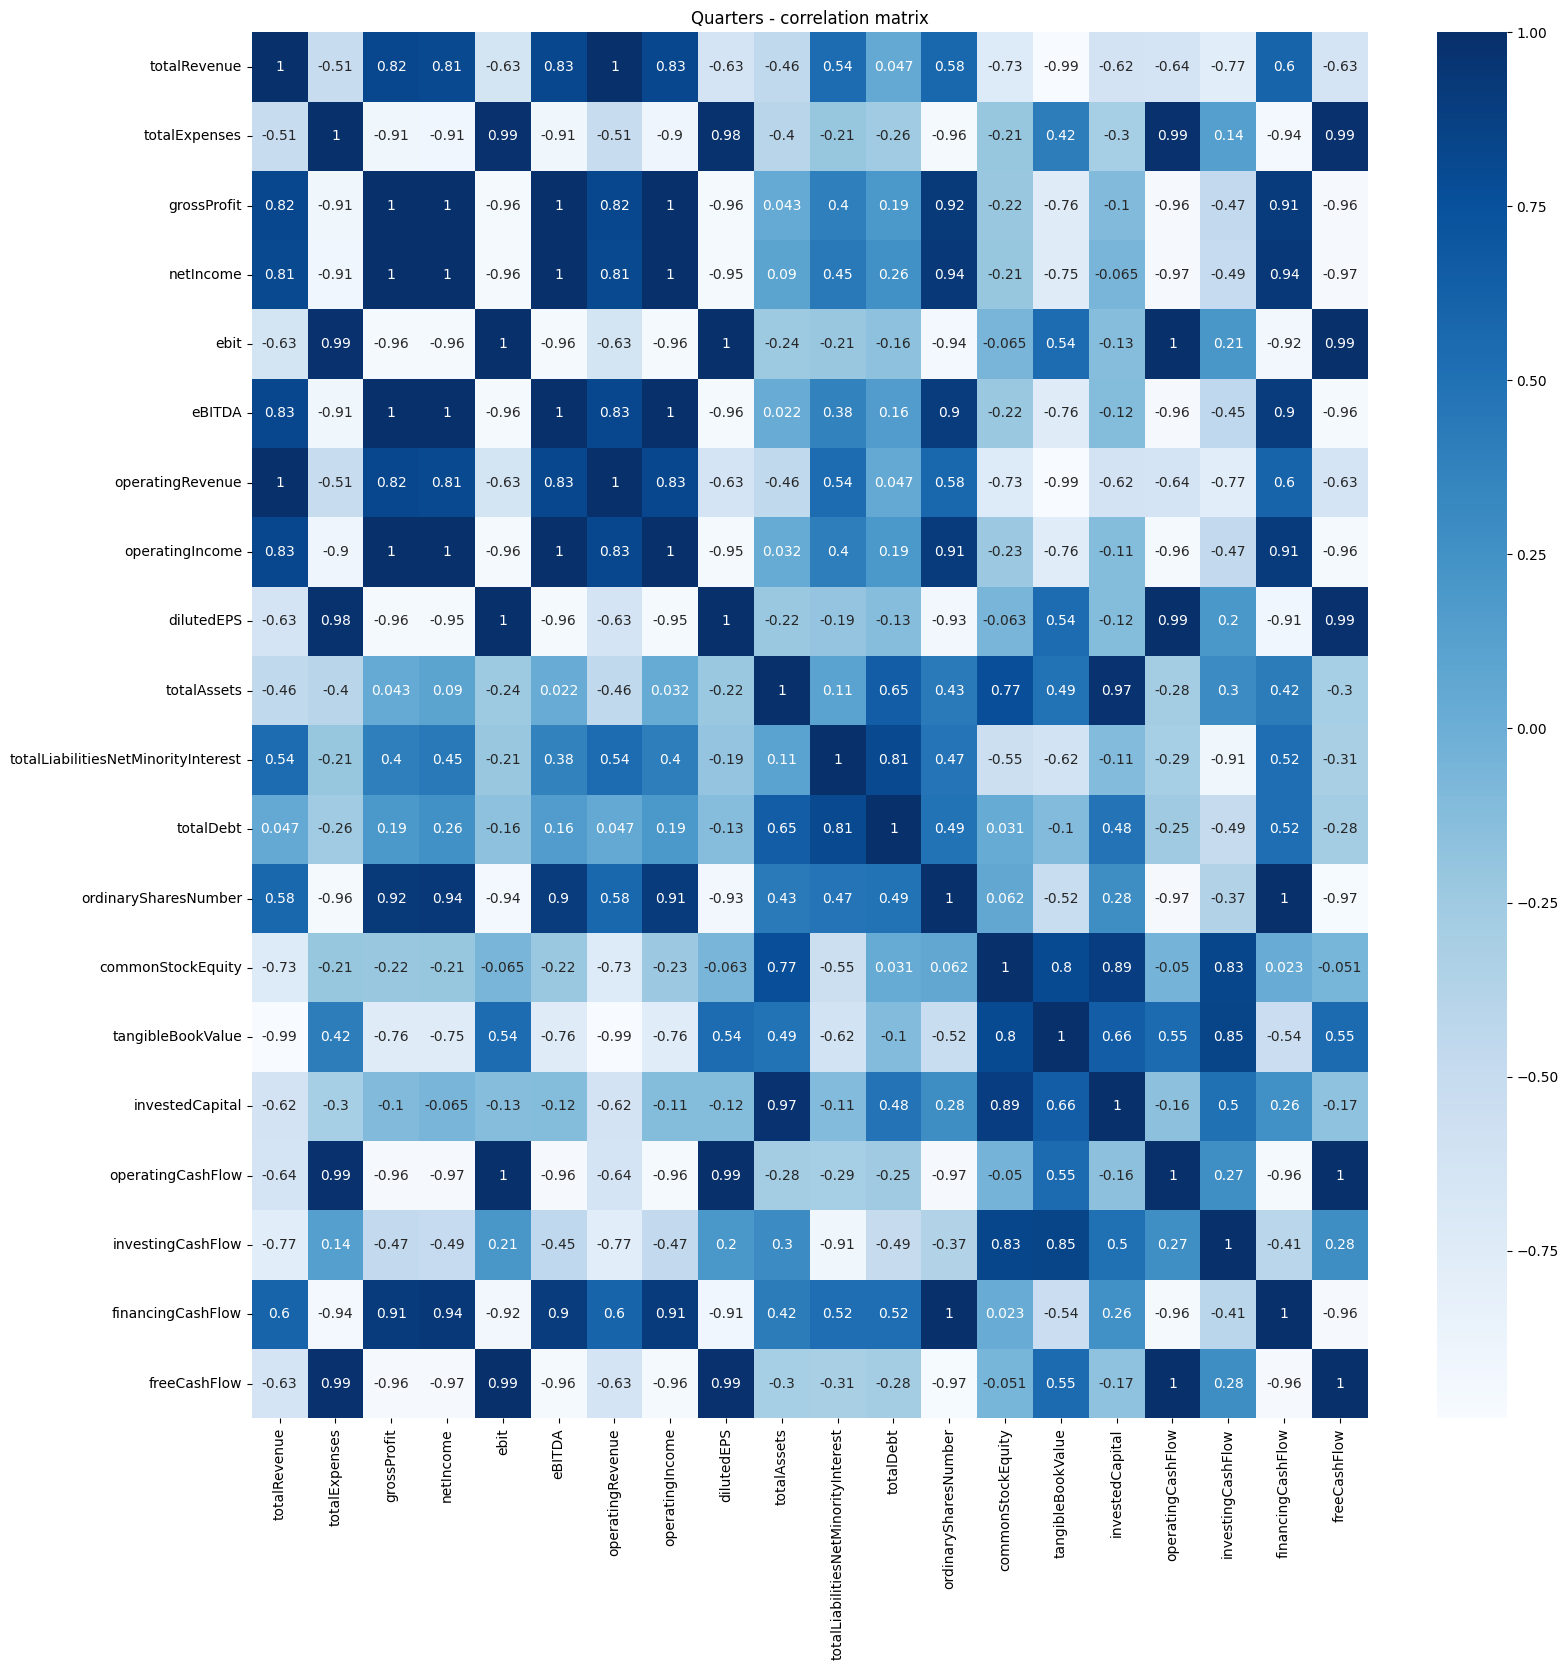

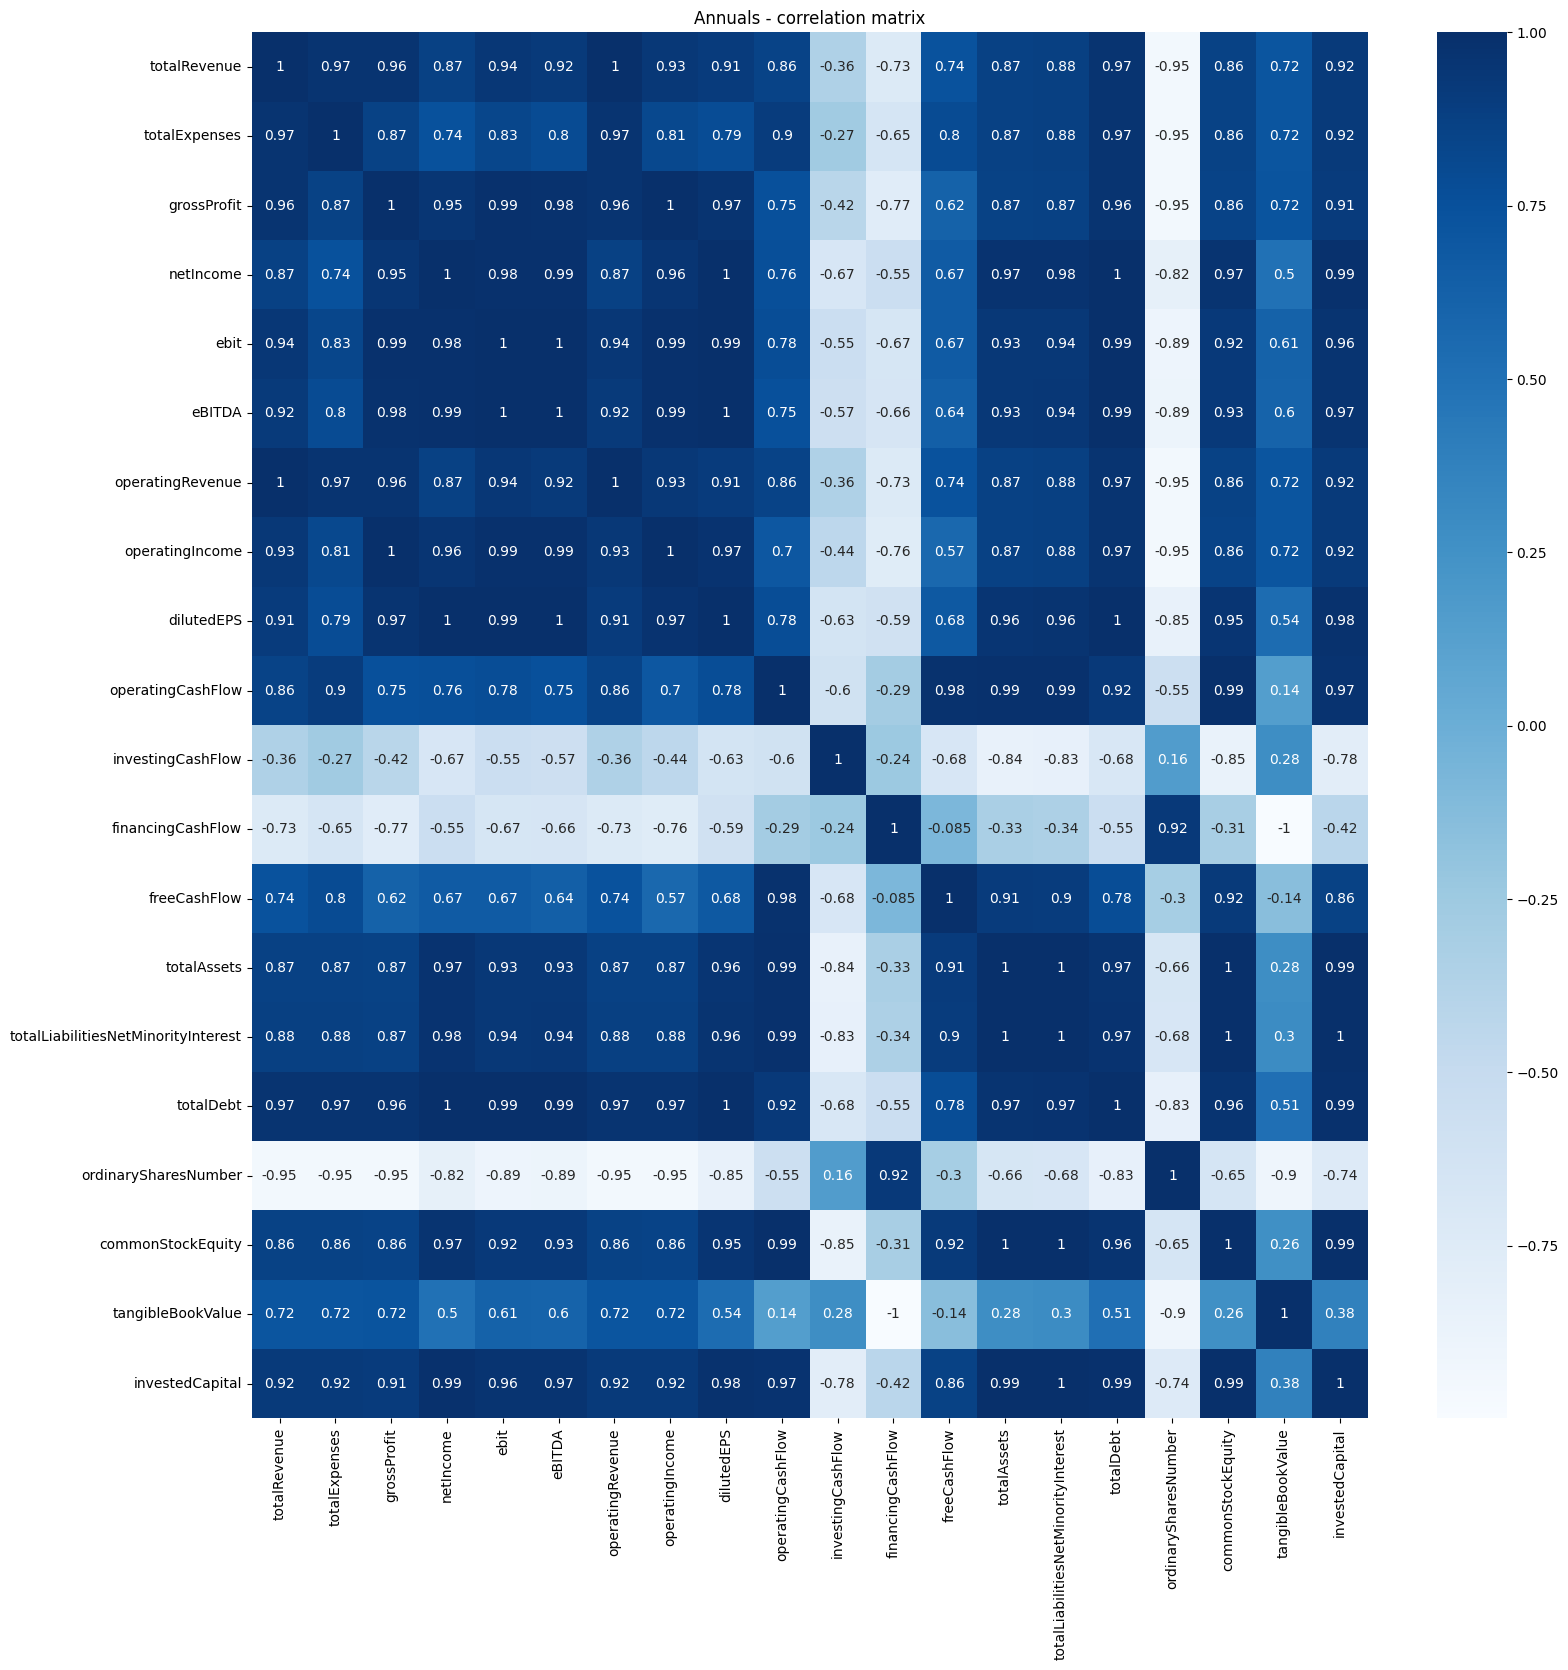

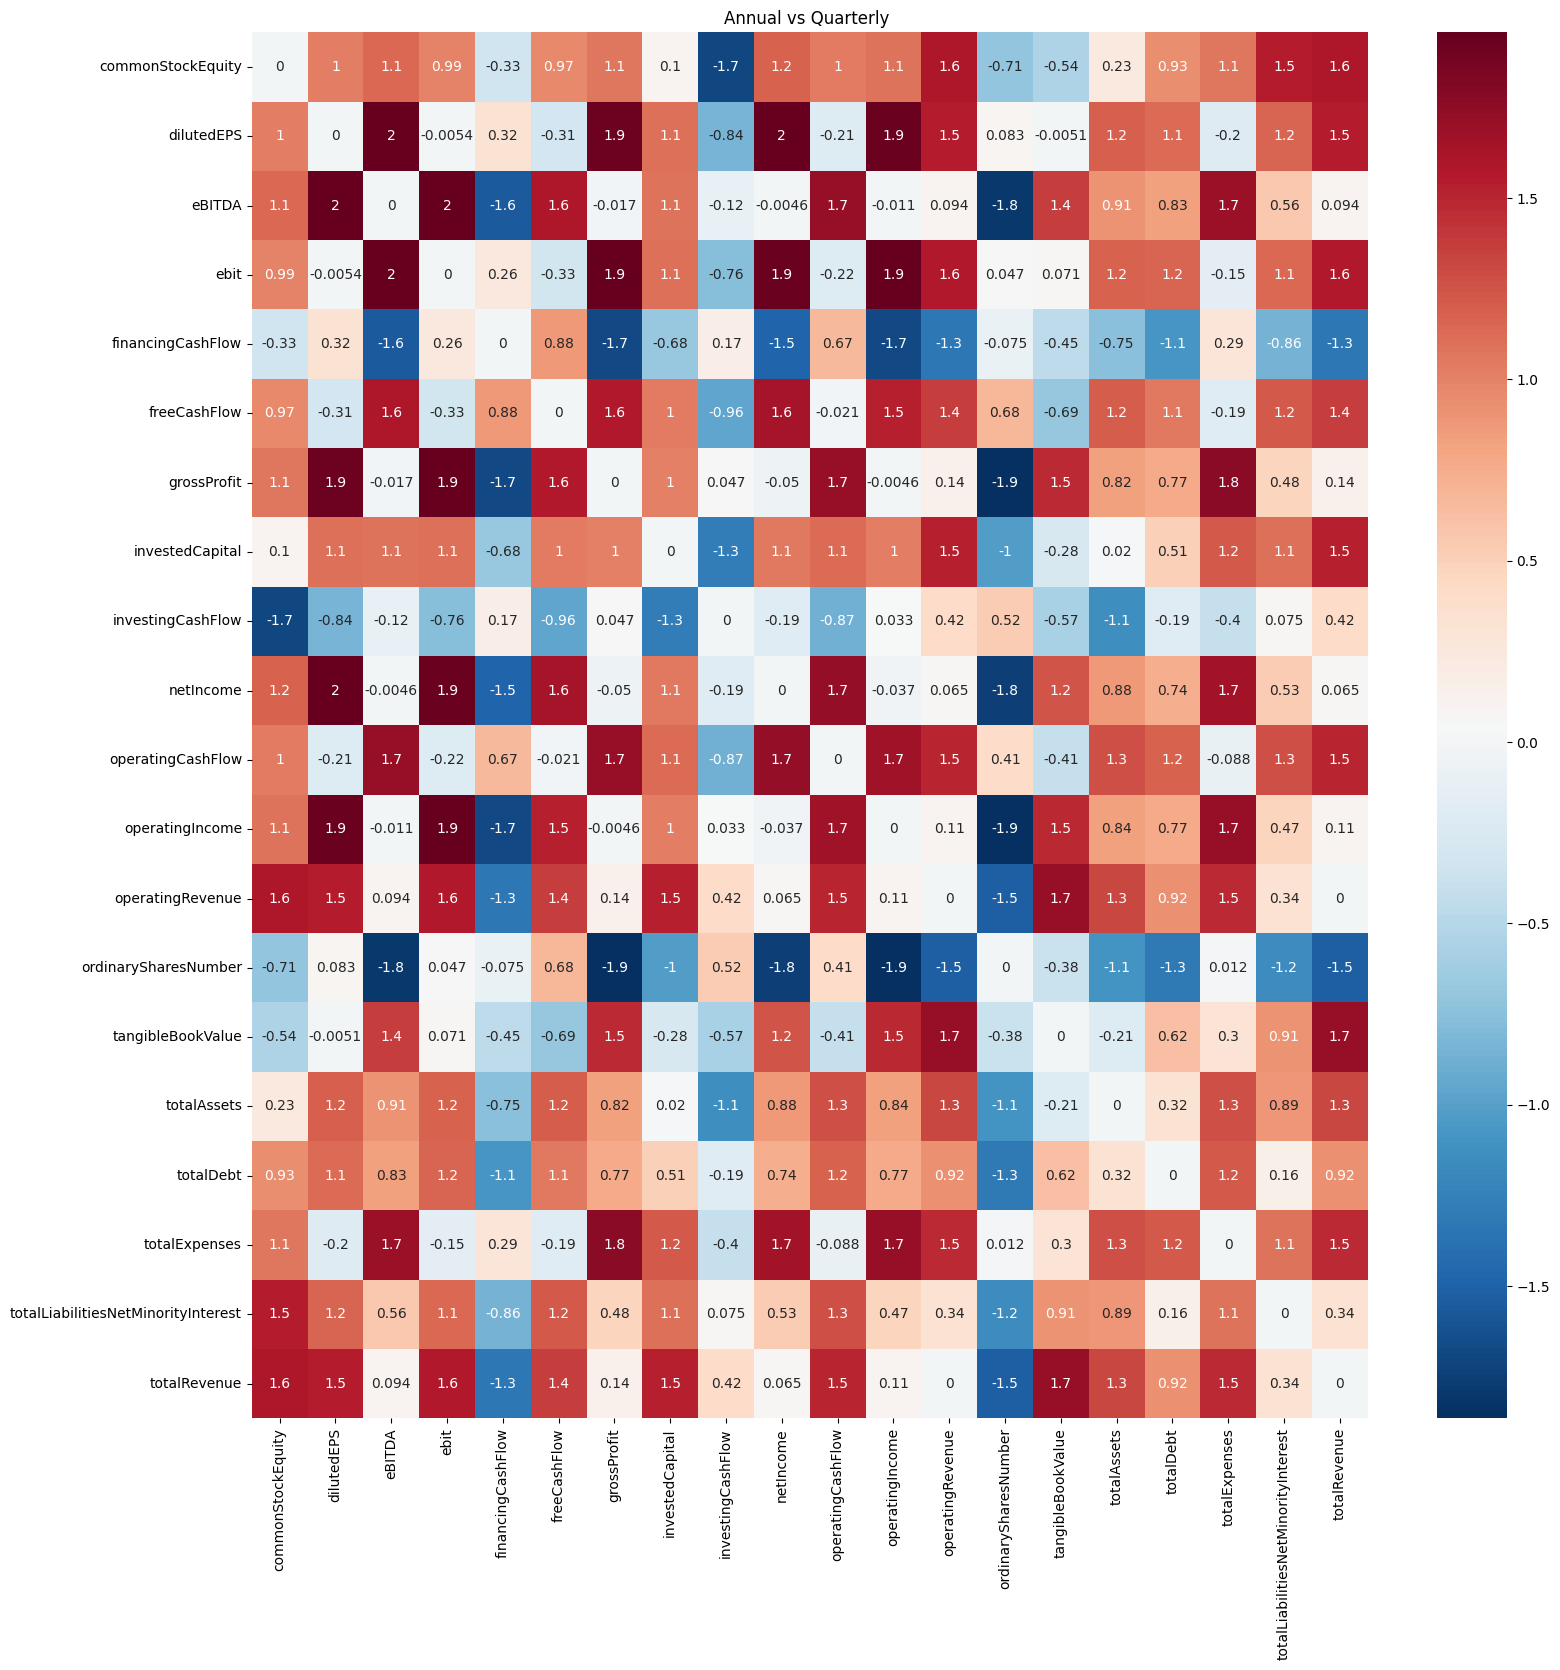

In [50]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(quarter_corr, annot=True, cmap="Blues", ax=ax)
plt.title("Quarters - correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(annual_corr, annot=True, cmap="Blues", ax=ax)
plt.title("Annuals - correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(18,18))
i_diff = annual_corr - quarter_corr
sns.heatmap(i_diff, annot=True, cmap="RdBu_r", ax=ax)
plt.title("Annual vs Quarterly ")
plt.show()